#SARIMAX MODEL


Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA).

Here We have applied Sarimax model with monthly seasonality on Adilabad District univariate AQI data provided by NASSCOM.


In [112]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [113]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Adilabad'] = pd.to_numeric(df['Adilabad'],errors='coerce')

# EDA

In [114]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad              object
Adilabad              float64
Kuda, warangal          int64
Mee-Seva, Warangal      int64
Khammam                object
Karimnagar              int64
dtype: object
Nizamabad              0
Adilabad              13
Kuda, warangal         0
Mee-Seva, Warangal     0
Khammam                0
Karimnagar             0
dtype: int64


<AxesSubplot:xlabel='Month'>

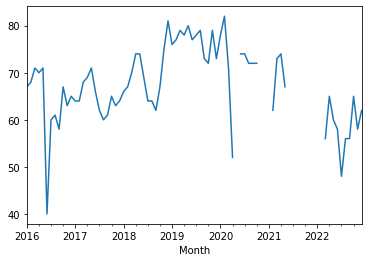

In [115]:
df["Adilabad"].plot()

In [116]:
df['Adilabad'] = df['Adilabad'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

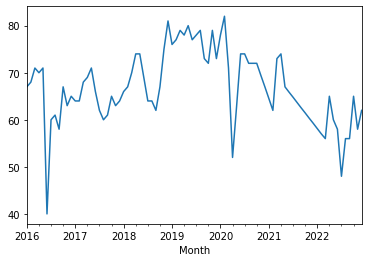

In [117]:
df["Adilabad"].plot()

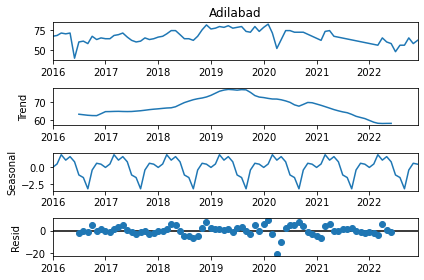

In [118]:
decompose_data = seasonal_decompose(df["Adilabad"], model="additive")
decompose_data.plot();

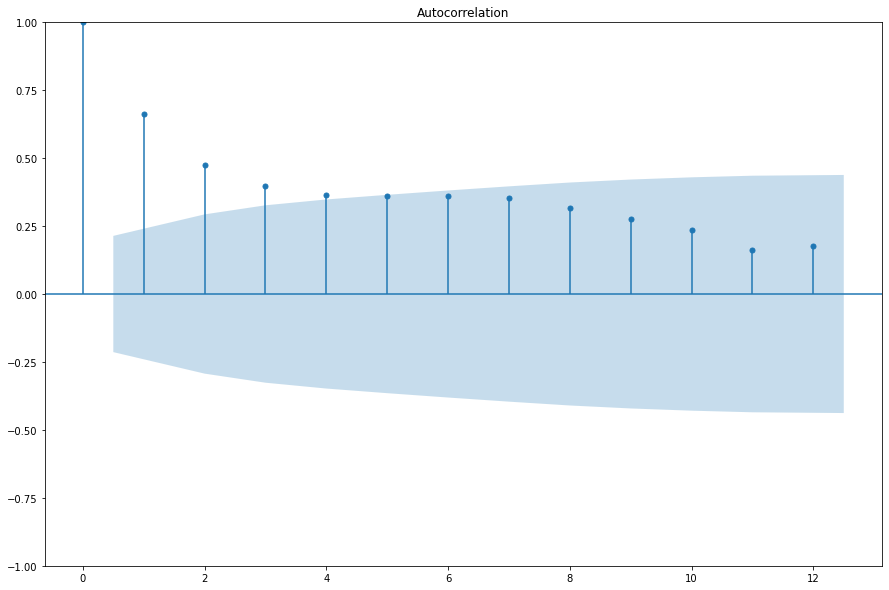

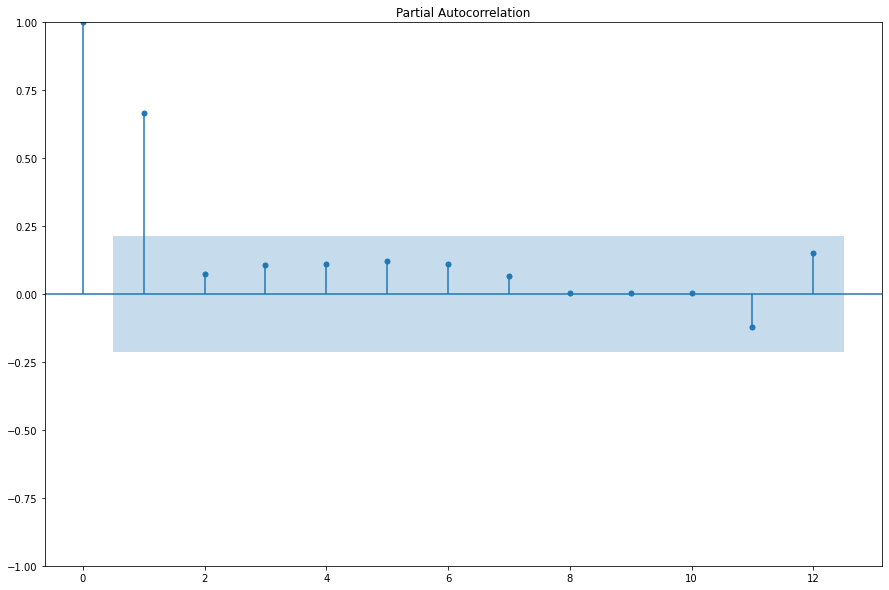

In [119]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
f_acf = plot_acf(df['Adilabad'], lags=12)
f_pacf = plot_pacf(df['Adilabad'], lags=12, method='ols')
f_acf.set_figheight(10)
f_acf.set_figwidth(15)
f_pacf.set_figheight(10)
f_pacf.set_figwidth(15)
plt.show()

# MODEL

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-120-8637cefd232e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forecast']=results.predict(start=71,end=83,dynamic=True)


             Adilabad   forecast
Month                           
2022-01-01  58.134868  62.949235
2022-02-01  57.013158  63.283708
2022-03-01  56.000000  67.623802
2022-04-01  65.000000  65.723336
2022-05-01  60.000000  65.075778
2022-06-01  58.000000  60.924365
2022-07-01  48.000000  62.113420
2022-08-01  56.000000  61.430720
2022-09-01  56.000000  59.755437
2022-10-01  65.000000  61.300972
2022-11-01  58.000000  61.589324
2022-12-01  62.000000  62.457178


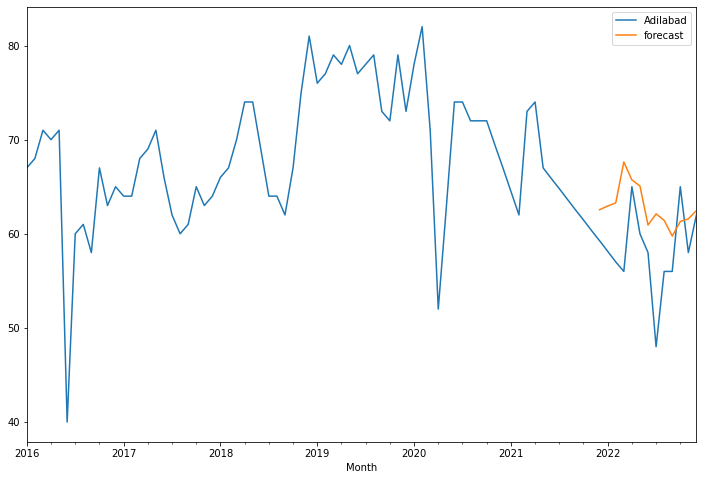

In [120]:
data = df[["Adilabad"]]
model=sm.tsa.statespace.SARIMAX(df["Adilabad"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=71,end=83,dynamic=True)
data[['Adilabad','forecast']].plot(figsize=(12,8))
print(data.tail(12))

<AxesSubplot:>

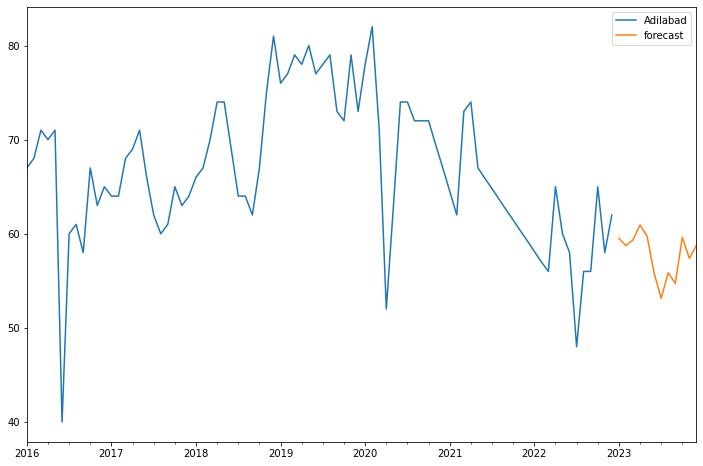

In [122]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=data.columns)
df5 = pd.concat([data,pred_date])
df5['forecast'] = results.predict(start = 84, end = 95, dynamic= True)  
df5[['Adilabad', 'forecast']].plot(figsize=(12, 8))

# ERROR CALCULATION

In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(df["Adilabad"].iloc[-12:], data["forecast"].iloc[-12:])),2)
mae = round(mean_absolute_error(df["Adilabad"].iloc[-12:], data["forecast"].iloc[-12:]),2)
mape = mean_absolute_percentage_error(df["Adilabad"].iloc[-12:], data["forecast"].iloc[-12:])
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 6.47
MAE  : 5.21
MAPE : 9.422879037531551%


The mean absolute percentage error is : 9.43%
Hence our accuracy is : 80.57%
which is acceptable

In [129]:
df5["Adilabad"][-12:]=df5["forecast"][-12:]
df_final = df5[["Adilabad"]]

,Adilabad
2016-01-01,67.000000
2016-02-01,68.000000
2016-03-01,71.000000
2016-04-01,70.000000
2016-05-01,71.000000
...,...
2023-08-01,55.868874
2023-09-01,54.729408
2023-10-01,59.627109
2023-11-01,57.387218


In [130]:
df_final.to_csv("Adilabad_AQI_S")